### 1\. Environment Setup

-   **Version Control**: Use Git for version control to keep track of changes and experiments.
-   **Virtual Environment**: Set up a virtual environment using `venv` or `conda` to manage dependencies.
-   **Dependency Management**: Create a `requirements.txt` or `environment.yml` file to keep track of your Python libraries.

In [4]:
import modin.pandas as pd
import numpy as np
import re
from markdown import markdown
from bs4 import BeautifulSoup
from bokeh.io import show, output_notebook
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource
import matplotlib.pyplot as plt
import seaborn as sns

df_essays = pd.read_csv('Data/llm-detect-ai-generated-text/train_essays.csv')
df_prompts = pd.read_csv('Data/llm-detect-ai-generated-text/train_prompts.csv')
dataframes = {
    'essays': df_essays,
    'prompts': df_prompts
}
dataframes['essays'].head()
dataframes['prompts'].head()

In [7]:
# Assuming you have a DataFrame 'df' with your essay data
df_essays = dataframes["essays"]
df_prompts = dataframes["prompts"]
# Assuming df_essays and df_prompts are your loaded data frames with the text

def clean_markdown(markdown_text):
    # Convert markdown to text
    html = markdown(markdown_text)
    # Use 'string=True' instead of 'text=True'
    text = ''.join(BeautifulSoup(html, "html.parser").findAll(string=True))
    return text

def clean_text(text):
    # Remove special characters
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Remove extra whitespaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Apply the cleaning functions to the text columns
df_essays['text'] = df_essays['text'].apply(clean_text)
df_prompts["instructions"] = df_prompts["instructions"].apply(clean_markdown).apply(clean_text)
df_prompts['source_text'] = df_prompts['source_text'].apply(clean_markdown).apply(clean_text)

# Now df_essays and df_prompts have cleaned text columns
df_essays.head()
df_prompts.head()

## put it back in the dataframes dict
dataframes = {
    'essays': df_essays,
    'prompts': df_prompts
}


### Expierementing

-   **Data Quality Check**:
    
    -   Check for missing values in the essays and prompts.
    -   Look for any anomalies or outliers in the data, such as essays that are unusually short or long.

Data Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1378 entries, 0 to 1377
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         1378 non-null   object
 1   prompt_id  1378 non-null   int64 
 2   text       1378 non-null   object
 3   generated  1378 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 43.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1378 entries, 0 to 1377
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         1378 non-null   object
 1   prompt_id  1378 non-null   int64 
 2   text       1378 non-null   object
 3   generated  1378 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 43.2+ KB
None
Missing Values:
id           0
prompt_id    0
text         0
generated    0
dtype: int64
id           0
prompt_id    0
text         0
generated    0
dtype: int64


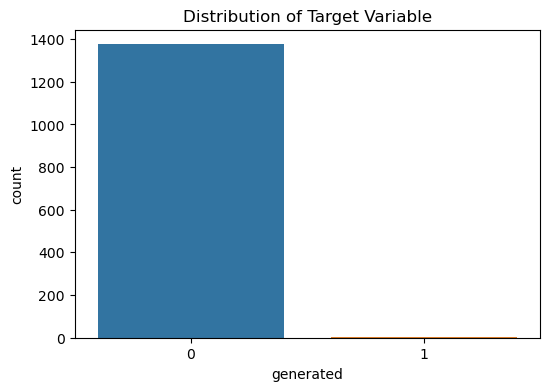

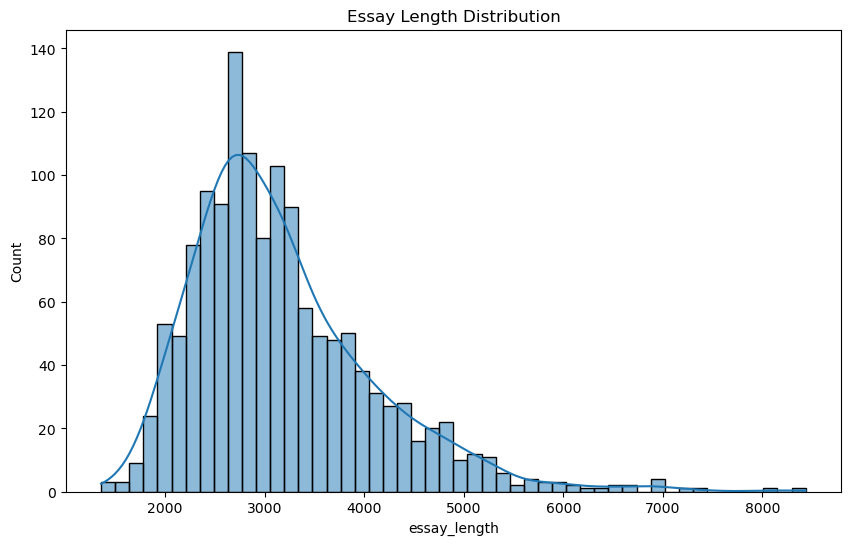

In [19]:
from bokeh.io import show, output_notebook
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a DataFrame 'df' with your essay data
df_essays = pd.read_csv('Data/llm-detect-ai-generated-text/train_essays.csv')
df_prompts = pd.read_csv('Data/llm-detect-ai-generated-text/train_essays.csv')

# Data Summary
print("Data Summary:")
print(df_essays.info())
print(df_prompts.info())

# Missing Values
print("Missing Values:")
print(df_essays.isnull().sum())
print(df_prompts.isnull().sum())

# Target Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='generated', data=df_essays)
plt.title('Distribution of Target Variable')
plt.show()

# Text Length Analysis
df_essays['essay_length'] = df_essays['text'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(df_essays['essay_length'], bins=50, kde=True)
plt.title('Essay Length Distribution')
plt.show()



In [20]:
# Word Frequency Analysis
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

import nltk

# To download specific datasets, use the nltk.download() function with the name of the resource.
nltk.download('punkt')       # for tokenization
nltk.download('stopwords')   # for stopwords

[nltk_data] Downloading package punkt to /Users/lange/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/lange/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [22]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Tokenize a sentence
sentence = "This is an example sentence."
tokens = word_tokenize(sentence)

# Filter out stopwords
filtered_tokens = [word for word in tokens if word not in stopwords.words('english')]

print(filtered_tokens)

['This', 'example', 'sentence', '.']


Most Common Words:
[('people', 5510), ('car', 4842), ('vote', 4779), ('The', 4572), ('Electoral', 4052), ('would', 3740), ('cars', 3654), ('electoral', 3152), ('College', 2790), ('In', 2539), ('states', 2220), ('popular', 2165), ('This', 2067), ('I', 2036), ('many', 1946), ('get', 1940), ('one', 1934), ('usage', 1912), ('votes', 1902), ('college', 1825)]


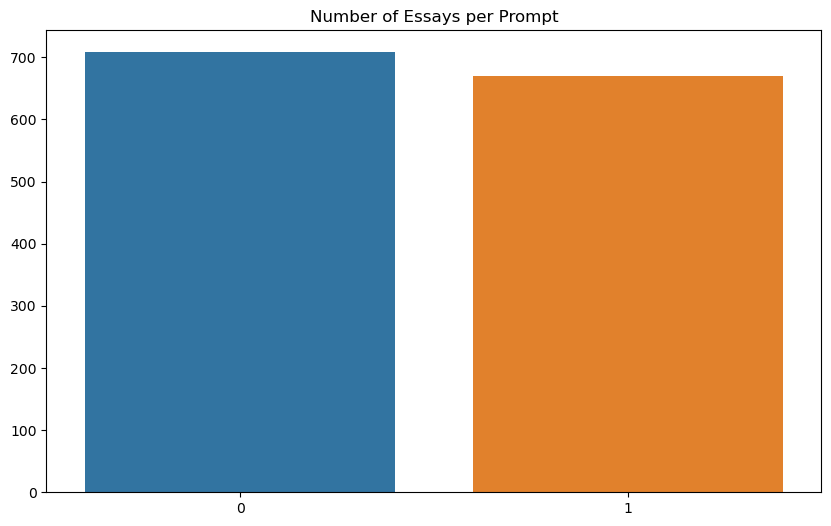

In [24]:

# Assuming you've already cleaned the 'text' column
words = df_essays['text'].str.cat(sep=' ').split()
# Remove stopwords
words = [word for word in words if word not in stopwords.words('english')]
word_freq = Counter(words)

# Most common words
common_words = word_freq.most_common(20)
print("Most Common Words:")
print(common_words)

# Prompt Analysis
prompt_counts = df_essays['prompt_id'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=prompt_counts.index, y=prompt_counts.values)
plt.title('Number of Essays per Prompt')
plt.show()


-   **Descriptive Statistics**:
    
    -   Calculate basic statistics for the lengths of essays, such as mean, median, standard deviation, min, and max.
    -   Determine the distribution of essay lengths to see if there's a significant difference between human and LLM-generated essays.


-   **Text Analysis**:
    
    -   Analyze the distribution of word counts and sentence lengths.
    -   Perform tokenization to see the most common words and phrases used in both human and LLM-generated essays.
    -   Use word clouds to visualize the most frequent terms.

-   **Prompt Analysis**:
    
    -   Examine if certain prompts are more likely to be associated with LLM-generated essays.
    -   Analyze the complexity of the prompts and see if there's a correlation with the essays' complexity.


-   **Stylistic Features**:
    
    -   Look at the use of punctuation, capitalization, and paragraph breaks.
    -   Analyze the use of first-person vs. third-person narrative.


-   **N-gram Analysis**:
    
    -   Perform n-gram analysis to identify common bi-grams and tri-grams.
    -   Compare the n-gram distributions between human and LLM-generated essays.


-   **Readability Scores**:
    
    -   Calculate readability scores (e.g., Flesch-Kincaid, Gunning-Fog) for the essays to see if there's a difference in complexity.


-   **Sentiment Analysis**:
    
    -   Perform sentiment analysis to determine the overall sentiment of the essays and compare between the two groups.


-   **Topic Modeling**:
    
    -   Use LDA (Latent Dirichlet Allocation) or other topic modeling techniques to discover topics within the essays.
    -   Compare the distribution of topics between human and LLM-generated essays.


-   **Cross-reference Analysis**:
    
    -   Analyze how essays refer to the source text provided in the prompts.
    -   Look for patterns in references to specific paragraphs or sections of the source text.


-   **Pairwise Comparisons**:
    
    -   Compare essays responding to the same prompt to see if there are notable differences in style, content, and structure.

-   **Correlation Analysis**:
    
    -   Look for correlations between essay features (e.g., length, complexity) and the target variable (human vs. LLM-generated).


-   **Visualization**:
    
    -   Use histograms, box plots, and scatter plots to visualize the distributions and relationships in the data.
    -   Employ t-SNE or PCA for high-dimensional data visualization to see if there are natural clusters forming.